# Machine Learning Assignment 2
Muhammad Ghulam Abbas (29417) and Muhammad Adnan Ali(29401)

This project analyze the effects of different techniques on the performance of machine learning models for regression and classification tasks using four datasets. The analysis focuses on evaluating the impact of cross-validation and feature selection methods, including filter, wrapper, and PCA.

# k Nearest Neighbours

In this project we will explore some of the fundamentals of Machine Learning using the K-Nearest Neighbors algorithm. We will apply it to help us predict a cars market price based on its attributes

# Dataset Description

The dataset was obtained from the UC Irvine Machine Learning Repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository http://archive.ics.uci.edu/ml. Irvine, CA: University of California, School of Information and Computer Science.)

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_path = "C:/Users/lenovo1/Downloads/automobile/imports-85.data"
df= pd.read_csv(file_path)

In [3]:
df = pd.read_csv("C:/Users/lenovo1/Downloads/automobile/imports-85.data",header=None,names=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"],na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
cols = ['normalized-losses','bore', 'stroke', 'horsepower', 'peak-rpm' , 'price']
for col in cols:
    df[col] = pd.to_numeric(df[col] ,  errors='coerce')

In [7]:
df.loc[df['num-of-doors'] == '?' , 'num-of-doors'] = np.nan


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
impute_df = df.copy()

In [10]:
small_nan_count_features = ['bore', 'stroke', 'peak-rpm', 'horsepower']
for feature in small_nan_count_features:
    mean_value = impute_df[feature].mean()
    impute_df[feature].fillna(mean_value , inplace = True)

In [11]:
impute_df[['bore', 'stroke', 'peak-rpm', 'horsepower']].isna().sum()

bore          0
stroke        0
peak-rpm      0
horsepower    0
dtype: int64

In [12]:
impute_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
pd.set_option('display.max_columns' , None)
impute_df.loc[impute_df['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [14]:
impute_df.loc[(impute_df['make'] == 'dodge') & (impute_df['body-style'] == 'sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [15]:
impute_df.loc[(impute_df['make'] == 'mazda') & (impute_df['body-style'] == 'sedan')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [16]:
impute_df['num-of-doors'].fillna('four' , inplace = True)

In [17]:
impute_df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [18]:
impute_df['num-of-doors'] = impute_df['num-of-doors'].map({'two': 2 , 'four': 4})
impute_df['num-of-cylinders'] = impute_df['num-of-cylinders'].map({'two': 2 , 'three': 3 , 'four': 4 , 'five': 5 , 'six': 6 , 'eight':8 , 'twelve': 12})

In [19]:
impute_df['normalized-losses'].isna().sum()

41

In [20]:
categorical_cols = impute_df.select_dtypes('object').columns
impute_df = pd.get_dummies(impute_df , columns = categorical_cols).astype(float)

In [21]:
impute_df.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,NaN,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,NaN,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,NaN,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.0,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming impute_df is already defined
iter_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=50, random_state=0)
impute_df['normalized-losses'] = iter_imputer.fit_transform(impute_df[['normalized-losses']])


In [23]:
impute_df['normalized-losses'].isna().sum()


0

In [24]:
impute_df['price'].isna().sum()

4

In [25]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
knn_imputer.fit(impute_df)
impute_df = pd.DataFrame(knn_imputer.transform(impute_df) , columns = impute_df.columns)

In [26]:
impute_df['price'].isna().sum()

0

In [27]:
df[["normalized-losses" , 'num-of-doors' , 'num-of-cylinders' , 'bore' , 'stroke' , 'horsepower' , 'peak-rpm' , 'price']] = impute_df.loc[: , ["normalized-losses" , 'num-of-doors' , 'num-of-cylinders' , 'bore' , 'stroke' , 'horsepower' , 'peak-rpm' , 'price']]

In [28]:
df.describe()


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13256.923902
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,8006.380109
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Exploratory Data Analysis

Skewness for column 'symboling': 0.21107227205788776 (right-skewed)
Skewness for column 'normalized-losses': 0.8548022766908568 (right-skewed)
Skewness for column 'num-of-doors': -0.26769221579616626 (left-skewed)
Skewness for column 'wheel-base': 1.0502137758714858 (right-skewed)
Skewness for column 'length': 0.1559537713215604 (right-skewed)
Skewness for column 'width': 0.904003498786254 (right-skewed)
Skewness for column 'height': 0.06312273247192804 (right-skewed)
Skewness for column 'curb-weight': 0.681398189052588 (right-skewed)
Skewness for column 'num-of-cylinders': 2.8174590250466007 (right-skewed)
Skewness for column 'engine-size': 1.9476550452788108 (right-skewed)
Skewness for column 'bore': 0.02021071115159105 (right-skewed)
Skewness for column 'stroke': -0.6897843288328929 (left-skewed)
Skewness for column 'compression-ratio': 2.6108624576151533 (right-skewed)
Skewness for column 'horsepower': 1.3977631283295846 (right-skewed)
Skewness for column 'peak-rpm': 0.073591212456

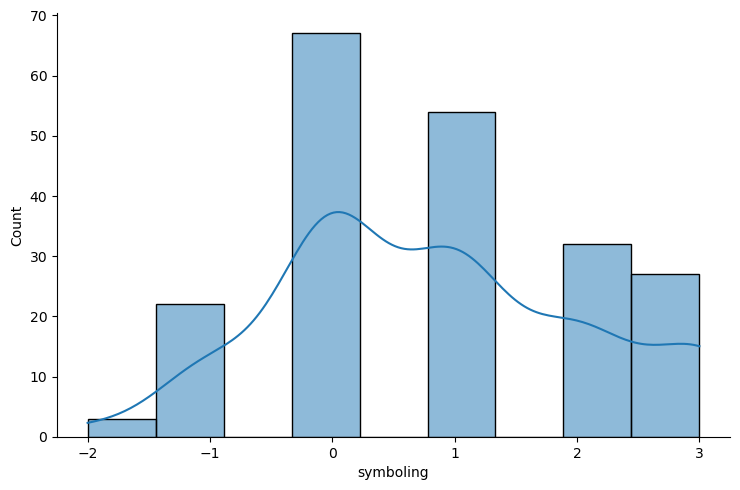

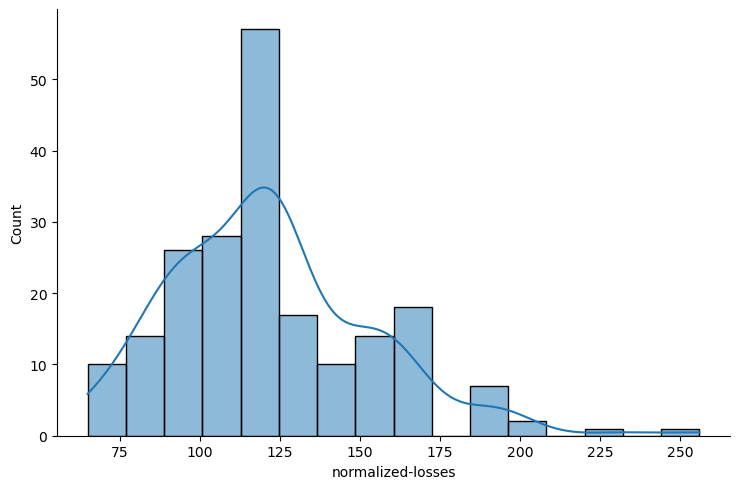

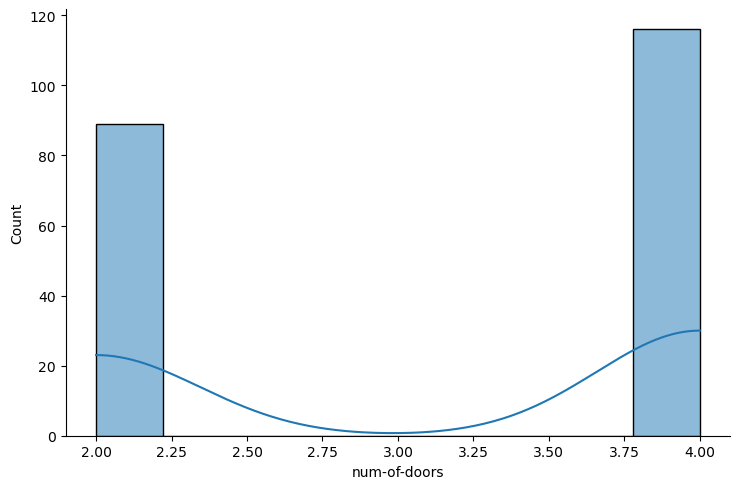

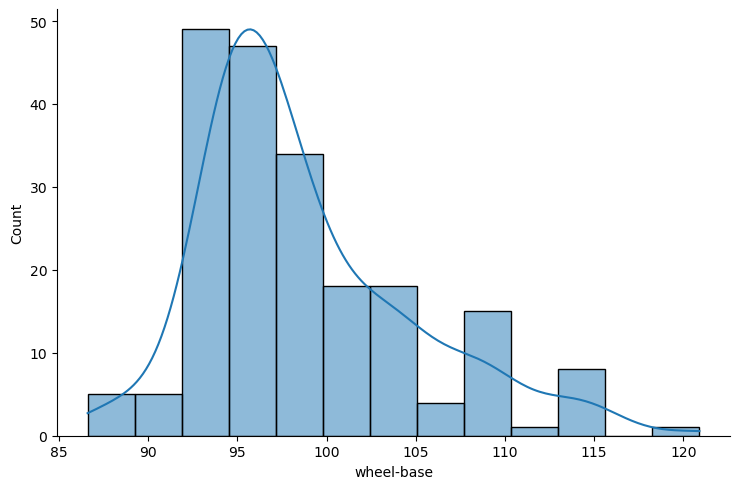

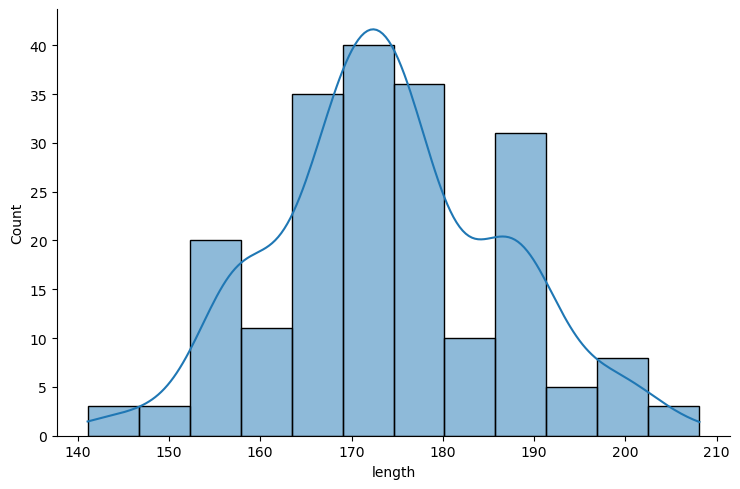

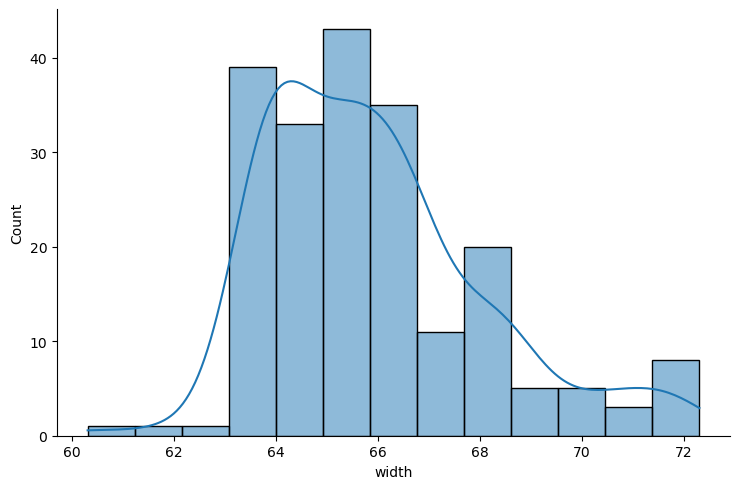

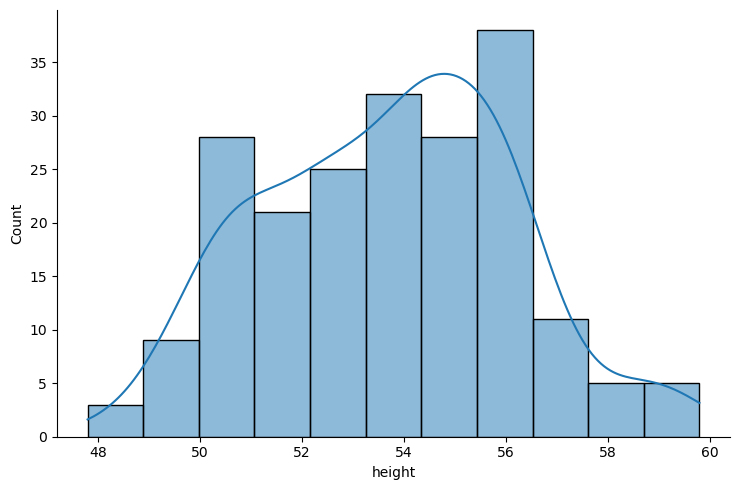

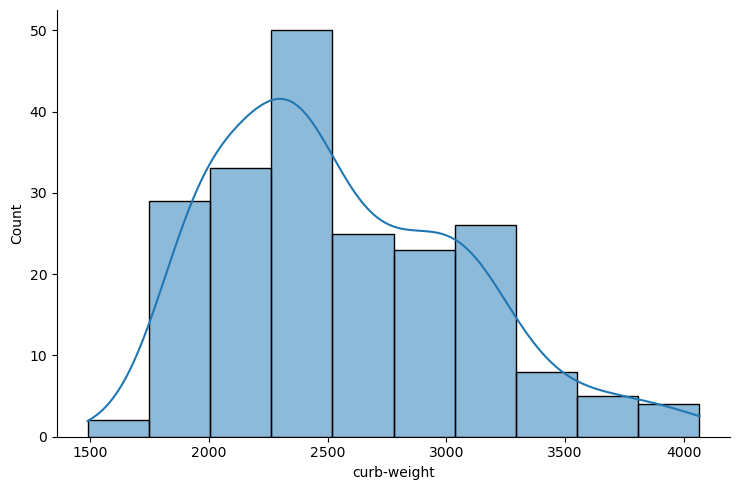

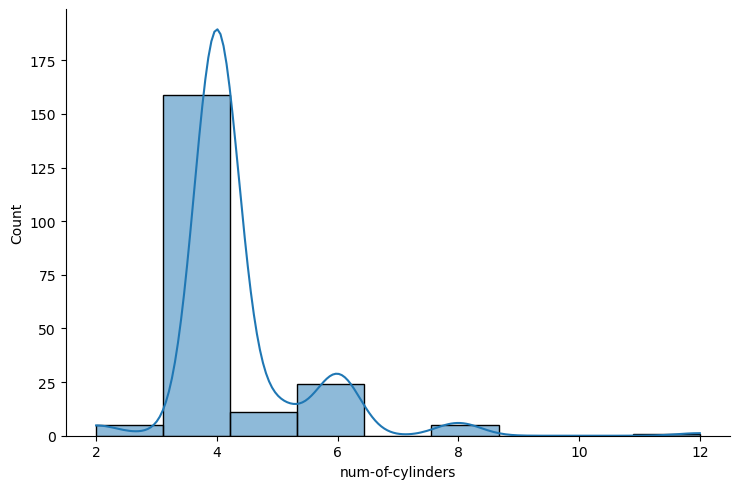

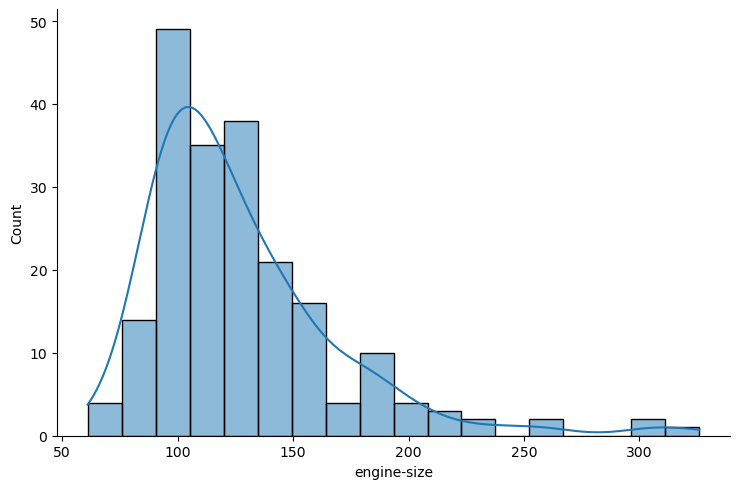

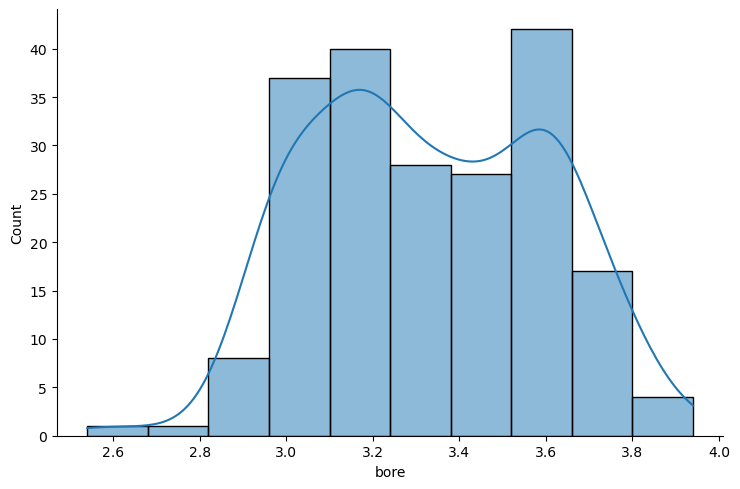

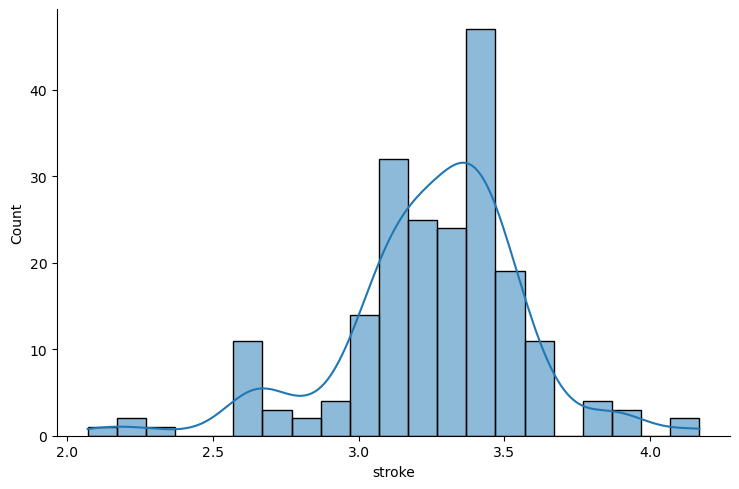

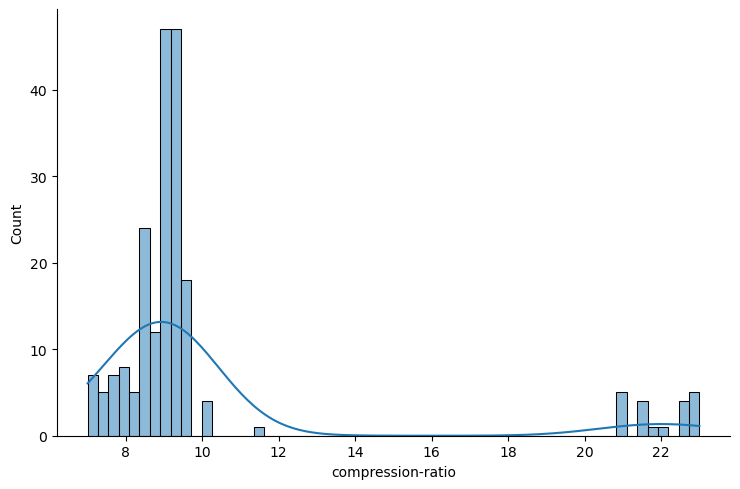

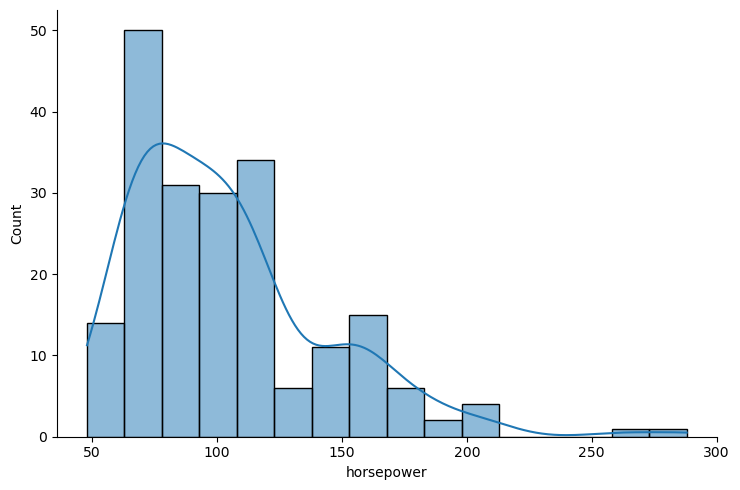

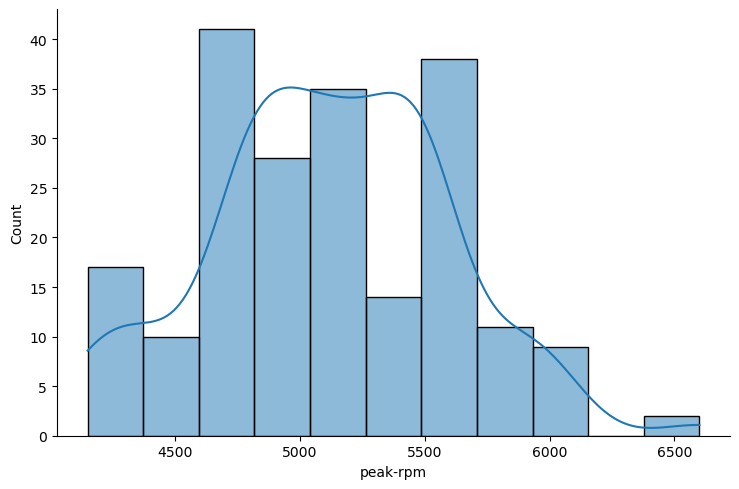

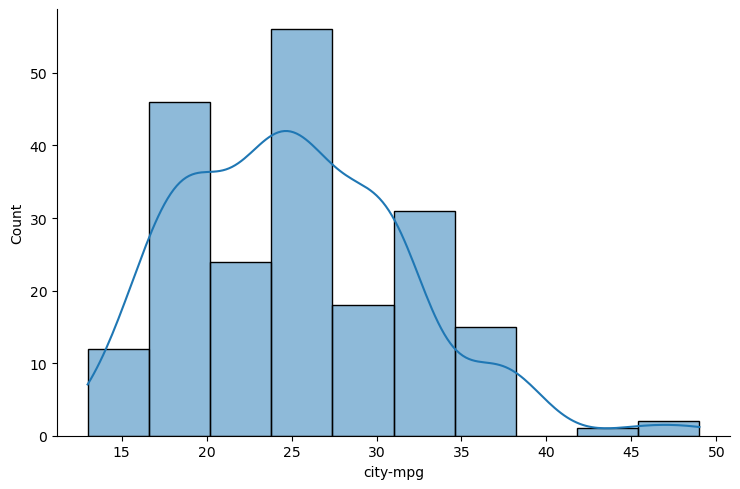

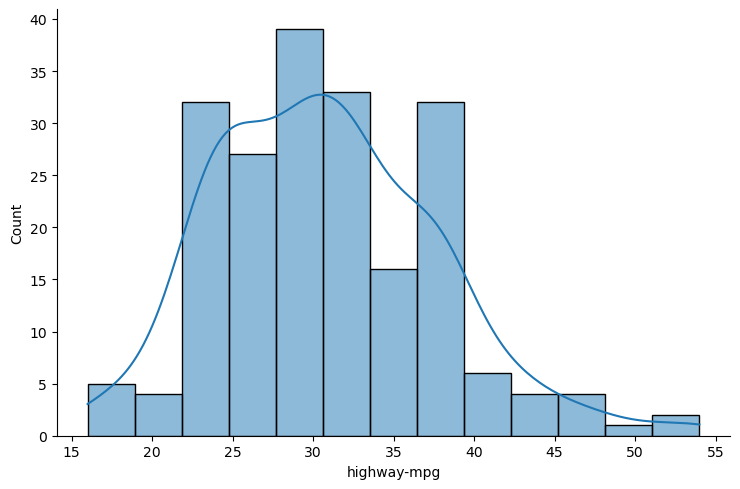

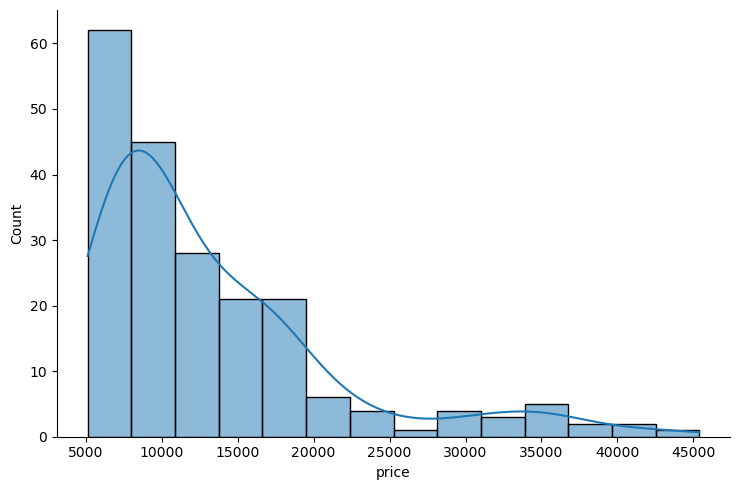

In [29]:
import seaborn as sns
import pandas as pd

def check_skewness(df):
    # Filter out non-numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Plot distributions for numeric columns
    for column in numeric_columns:
        sns.displot(x=column, data=df, kde=True, aspect=1.5)
        skewness = df[column].skew()
        if skewness > 0:
            skewness_desc = "right-skewed"
        elif skewness < 0:
            skewness_desc = "left-skewed"
        else:
            skewness_desc = "approximately symmetric"
        print(f"Skewness for column '{column}': {skewness} ({skewness_desc})")

# Check skewness for each numeric column
check_skewness(df)

Most of the columns exhibit significant skewness, with the majority being right-skewed. Some columns have relatively low skewness values

In [31]:
df.describe().iloc[:,1:9].T[['mean','50%']]


,mean,50%
normalized-losses,122.000000,122.0
num-of-doors,3.131707,4.0
wheel-base,98.756585,97.0
length,174.049268,173.2
width,65.907805,65.5
height,53.724878,54.1
curb-weight,2555.565854,2414.0
num-of-cylinders,4.380488,4.0


In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
corr = df.corr()
corr_values = corr['price'].sort_values().round(3)
corr_values

highway-mpg         -0.704
city-mpg            -0.693
peak-rpm            -0.087
symboling           -0.080
num-of-doors         0.025
compression-ratio    0.067
stroke               0.082
height               0.121
normalized-losses    0.132
bore                 0.553
wheel-base           0.579
length               0.687
num-of-cylinders     0.716
width                0.761
horsepower           0.807
curb-weight          0.838
engine-size          0.874
price                1.000
Name: price, dtype: float64

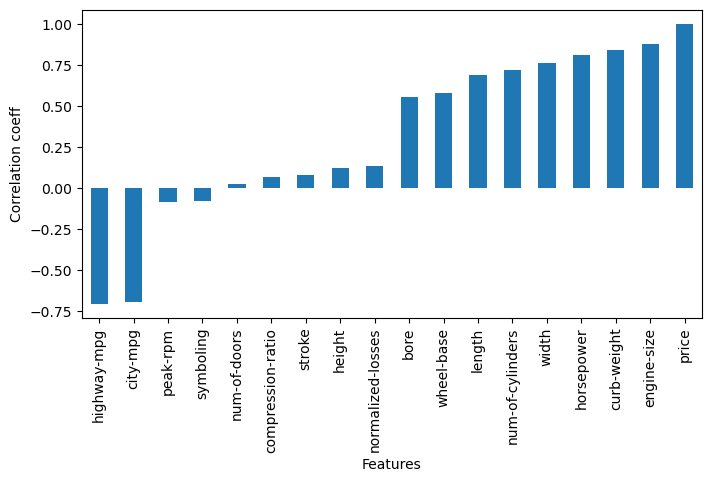

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
corr_values.plot.bar()
plt.xlabel('Features')
plt.ylabel('Correlation coeff')
plt.show()

In [35]:
corr.round(2)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.47,-0.66,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.47,1.00,-0.36,-0.06,0.02,0.08,-0.37,0.10,0.11,0.11,-0.03,0.05,-0.11,0.20,0.24,-0.22,-0.18,0.13
num-of-doors,-0.66,-0.36,1.00,0.44,0.39,0.20,0.54,0.19,-0.02,0.01,0.11,-0.01,0.17,-0.13,-0.24,-0.01,-0.04,0.03
wheel-base,-0.53,-0.06,0.44,1.00,0.87,0.80,0.59,0.78,0.34,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
length,-0.36,0.02,0.39,0.87,1.00,0.84,0.49,0.88,0.43,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.69
width,-0.23,0.08,0.20,0.80,0.84,1.00,0.28,0.87,0.55,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
height,-0.54,-0.37,0.54,0.59,0.49,0.28,1.00,0.30,-0.01,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curb-weight,-0.23,0.10,0.19,0.78,0.88,0.87,0.30,1.00,0.61,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
num-of-cylinders,-0.11,0.11,-0.02,0.34,0.43,0.55,-0.01,0.61,1.00,0.85,0.23,0.01,-0.02,0.69,-0.12,-0.45,-0.47,0.72
engine-size,-0.11,0.11,0.01,0.57,0.68,0.74,0.07,0.85,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87


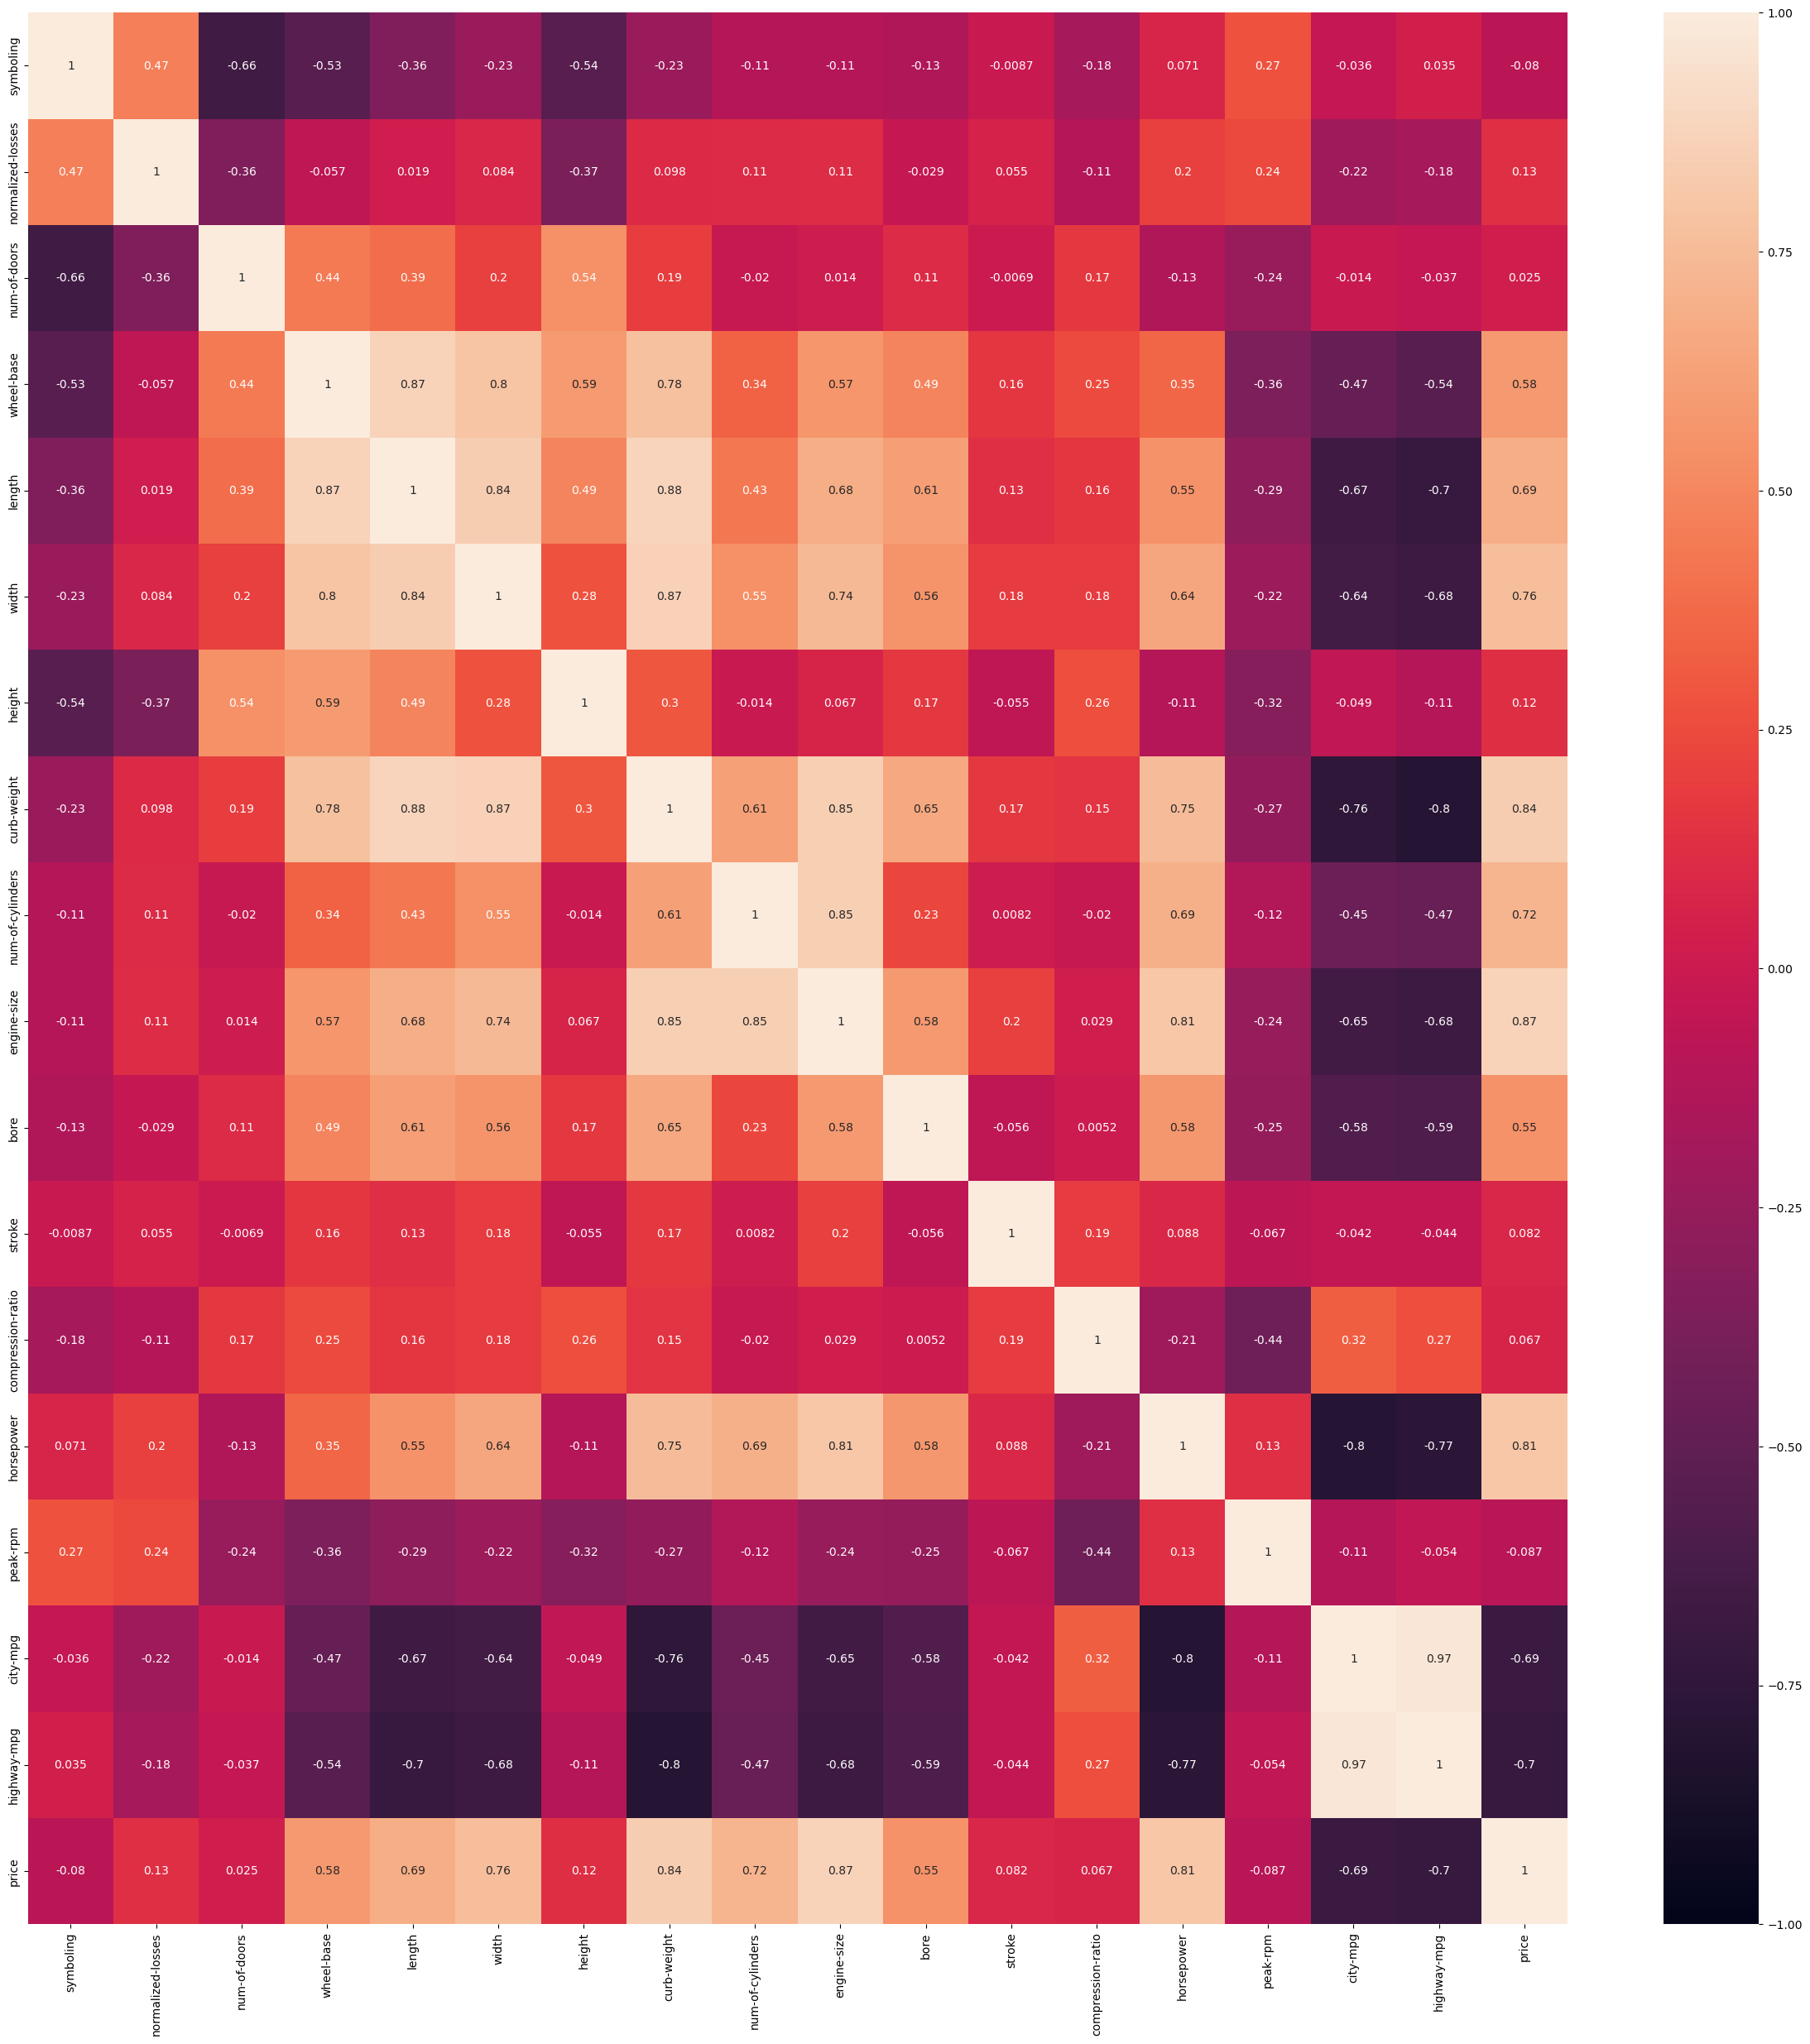

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
plt.figure(figsize =(30,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

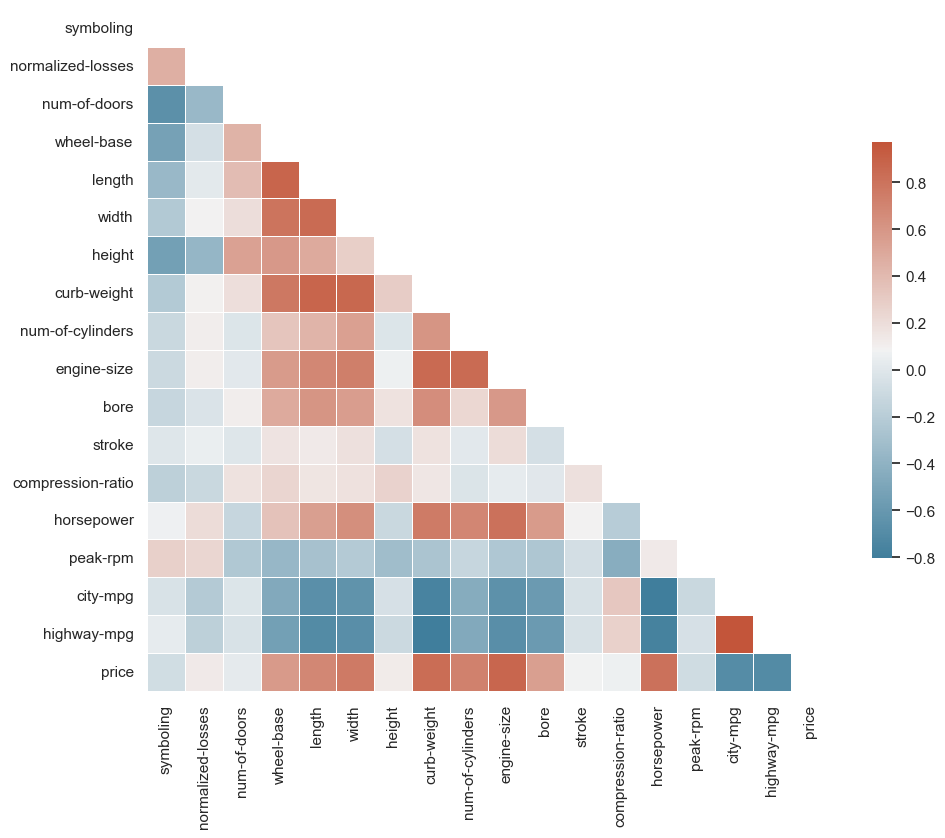

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.show()


In [40]:
import numpy as np

def create_features(df):
    df_copy = df.copy()
    # additional features
    df_copy['body-volume'] = df_copy['length'] * df_copy['width'] * df_copy['height']
    df_copy['curb-weight/engine-size'] = df_copy['curb-weight'] / df_copy['engine-size']
    df_copy['avg-mpg'] = (df_copy['highway-mpg'] + df_copy['city-mpg']) / 2
    df_copy['power-weight-ratio'] = df_copy['horsepower'] / df_copy['curb-weight']    
    # log transform for features with right skewed distributions
    df_copy['log-compression-ratio'] = np.log(df['compression-ratio'])
    df_copy['log-engine-size'] = np.log(df['engine-size'])
    df_copy.drop(['compression-ratio', 'engine-size'], axis=1, inplace=True)
    # group transforms
    df_copy['median_price_make'] = df_copy.groupby('make')['price'].transform('median')
    df_copy['median_price_body-style'] = df_copy.groupby('body-style')['price'].transform('median')
    return df_copy


# KNN REGRESSION

In [44]:
X = fe_df.drop('price' , axis = 1)
y = fe_df['price']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming fe_df is your dataframe containing the data
# Splitting data into features (X) and target (y)
X = fe_df.drop('price', axis=1)
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing data
X_train_processed = pd.DataFrame(pipeline.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(pipeline.transform(X_test), columns=preprocessor.get_feature_names_out())

# Function to perform KNN regression analysis
def knn_regression_analysis(X_train, X_test, y_train, y_test):
    # Training KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=2)
    knn_reg.fit(X_train, y_train)

    # Predicting on test set
    y_pred = knn_reg.predict(X_test)

    # Calculating scores
    train_score = knn_reg.score(X_train, y_train)
    test_score = knn_reg.score(X_test, y_test)

    # Applying cross-validation
    cv_scores = cross_val_score(knn_reg, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed

    return knn_reg, y_pred, train_score, test_score, cv_scores

# Function to calculate regression metrics
def calculate_regression_metrics(y_true, y_pred, train_score, test_score, cv_scores, X_train_processed):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_train_processed.shape[1]  # Number of predictors from training data
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score,
        "Test Score": test_score,
        "Cross-validated Train Scores": cv_scores
    }

    return evaluation_metrics

# Perform KNN regression analysis
knn_model, y_pred, train_score, test_score, cv_scores = knn_regression_analysis(X_train_processed, X_test_processed, y_train, y_test)

# Calculate regression metrics
metrics = calculate_regression_metrics(y_test, y_pred, train_score, test_score, cv_scores, X_train_processed)

# Print regression metrics
print(metrics)


{'RMSE': 3456.73022868468, 'RMSLE': 0.21567051345838484, 'MSE': 11948983.873902438, 'MAE': 2296.19756097561, 'R-squared': 0.8466532605814088, 'Adjusted R-squared': 1.191683424273239, 'Train Score': 0.9654909478169299, 'Test Score': 0.8466532605814088, 'Cross-validated Train Scores': array([0.85575952, 0.78098922, 0.86462462, 0.73736752, 0.77448031])}


 Although the train score before cross-validation appeared higher, the cross-validated train scores offer a more accurate representation of the model's performance

# FEATURE SELECTION METHOD

# 1.FILTER METHOD:-

In [58]:
variances = df.var()
variances

symboling            1.550789e+00
normalized-losses    1.003686e+03
num-of-doors         9.874701e-01
wheel-base           3.626178e+01
length               1.522087e+02
width                4.601900e+00
height               5.970800e+00
curb-weight          2.711079e+05
num-of-cylinders     1.168245e+00
engine-size          1.734114e+03
bore                 7.335631e-02
stroke               9.834308e-02
compression-ratio    1.577710e+01
horsepower           1.561768e+03
peak-rpm             2.275091e+05
city-mpg             4.279962e+01
highway-mpg          4.742310e+01
price                6.410212e+07
dtype: float64

In [72]:
#Setting Threshold Value  0.1
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold(X_train, threshold=0.01):
    var_thres = VarianceThreshold(threshold=threshold)
    var_thres.fit(X_train)
    selected_features = X_train.columns[var_thres.get_support()]
    non_constant_features_count = sum(var_thres.get_support())
    constant_columns = [column for column in X_train.columns if column not in selected_features]
    print("Number of non-constant features:", non_constant_features_count)
    print("Constant columns removed:", constant_columns)
    print("Selected features:", selected_features)
    return X_train_processed[selected_features]

In [74]:
X_train_filtered = apply_variance_threshold(X_train_processed,threshold=0.1)
X_train_filtered

Number of non-constant features: 15
Constant columns removed: ['num__symboling', 'num__normalized-losses', 'num__wheel-base', 'num__length', 'num__width', 'num__height', 'num__curb-weight', 'num__num-of-cylinders', 'num__bore', 'num__stroke', 'num__horsepower', 'num__peak-rpm', 'num__city-mpg', 'num__highway-mpg', 'num__body-volume', 'num__curb-weight/engine-size', 'num__avg-mpg', 'num__power-weight-ratio', 'num__log-compression-ratio', 'num__log-engine-size', 'num__median_price_make', 'num__median_price_body-style', 'cat__make_alfa-romero', 'cat__make_audi', 'cat__make_bmw', 'cat__make_chevrolet', 'cat__make_dodge', 'cat__make_honda', 'cat__make_isuzu', 'cat__make_jaguar', 'cat__make_mazda', 'cat__make_mercedes-benz', 'cat__make_mercury', 'cat__make_mitsubishi', 'cat__make_nissan', 'cat__make_peugot', 'cat__make_plymouth', 'cat__make_porsche', 'cat__make_saab', 'cat__make_subaru', 'cat__make_volkswagen', 'cat__make_volvo', 'cat__body-style_convertible', 'cat__body-style_hardtop', 'cat

,num__num-of-doors,cat__make_toyota,cat__fuel-type_diesel,cat__fuel-type_gas,cat__aspiration_std,cat__aspiration_turbo,cat__body-style_hatchback,cat__body-style_sedan,cat__body-style_wagon,cat__drive-wheels_fwd,cat__drive-wheels_rwd,cat__engine-type_ohc,cat__fuel-system_2bbl,cat__fuel-system_idi,cat__fuel-system_mpfi
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
160,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
162,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [75]:
# Extracting columns based on selected features
selected_columns = [col for col in fe_df.columns if any(col.startswith(feature) for feature in selected_features)]

# Creating DataFrame X with selected features
X = fe_df[selected_columns]


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming fe_df is your dataframe containing the data
# Columns present in the dataframe
fe_df_columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'body-volume',
                 'curb-weight/engine-size', 'avg-mpg', 'power-weight-ratio',
                 'log-compression-ratio', 'log-engine-size', 'median_price_make',
                 'median_price_body-style']

# Selected features
selected_features = ['num-of-doors', 'make', 'fuel-type', 'aspiration',
                     'body-style', 'drive-wheels', 'engine-type', 'fuel-system']

# Extracting columns based on selected features
selected_columns = [col for col in fe_df_columns if any(col.startswith(feature) for feature in selected_features)]

# Creating DataFrame X with selected features
X = fe_df[selected_columns]
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline including preprocessing and KNN regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # KNN regressor with 2 neighbors
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Training score
train_score = pipeline.score(X_train, y_train)

# Test score
test_score = pipeline.score(X_test, y_test)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Train Score: 0.9037238263598965
Test Score: 0.6901666992105827
Mean Squared Error: 24142626.89097561
Mean Absolute Error: 2961.880487804878
R-squared: 0.6901666992105827


after applying the variance threshold, the model performance on the training data remains similar, but there is a slight decrease in performance on the test data. This could indicate that the model might be overfitting less to the training data

# CORRELATION

In [78]:
def apply_pearson_correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    selected_features = [col for col in dataset.columns if col not in col_corr]
    return col_corr, selected_features

In [79]:
import pandas as pd

# Convert your NumPy array to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# Now apply the Pearson correlation function
correlated_features, selected_features = apply_pearson_correlation(X_train_df, 0.5)

# Print the results
print("Number of correlated features:", len(correlated_features))
print("Number of selected features:", len(selected_features))
print("Correlated features:", correlated_features)
print("Selected features:", selected_features)


Number of correlated features: 0
Number of selected features: 8
Correlated features: set()
Selected features: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']


In [80]:
# Selected features
selected_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']

# Selecting the specified features from the DataFrame
X_selected = fe_df[selected_features]
y = fe_df['price']


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Selected features
selected_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 
                     'body-style', 'drive-wheels', 'engine-type', 'fuel-system']

# Selecting the specified features from the DataFrame
X_selected = fe_df[selected_features]
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline including preprocessing and KNN regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # KNN regressor with 2 neighbors
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)
print("Train Score:", train_score)
print("Test Score:", test_score)


Mean Squared Error: 24142626.89097561
Mean Absolute Error: 2961.880487804878
R-squared: 0.6901666992105827
Train Score: 0.9037238263598965
Test Score: 0.6901666992105827


after considering correlation and potentially removing some features, the model's performance remains relatively unchanged. This suggests that the features removed might not have significantly impacted the model predictive ability, or the remaining features still capture most of the relevant information for making predictions.

# 2.WRAPPER METHOD

# FORWARD FEATURE SELECTION

In [88]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

def forward_feature_selection(X_train, y_train, n_features_to_select=3, n_estimators=100, random_state=0):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    selected_features = []
    for i in range(n_features_to_select):
        remaining_features = list(set(X_train.columns) - set(selected_features))
        best_score = -np.inf
        best_feature = None
        for feature in remaining_features:
            current_features = selected_features + [feature]
            cv_score = np.mean(cross_val_score(rf, X_train[current_features], y_train, cv=4, scoring='neg_mean_squared_error'))
            if cv_score > best_score:
                best_score = cv_score
                best_feature = feature
        selected_features.append(best_feature)

    return selected_features

# Example usage:
# selected_features = forward_feature_selection(X_train, y_train, n_features_to_select=3)
# print("Selected features:", selected_features)


In [90]:
selected_features = forward_feature_selection(X_train_processed, y_train, n_features_to_select=3)
print("Selected features:", selected_features)

Selected features: ['num__log-engine-size', 'num__width', 'num__median_price_make']


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming fe_df is your dataframe containing the data
# Columns present in the dataframe
fe_df_columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'body-volume',
                 'curb-weight/engine-size', 'avg-mpg', 'power-weight-ratio',
                 'log-compression-ratio', 'log-engine-size', 'median_price_make',
                 'median_price_body-style']

# Selected features
selected_features = ['num__log-engine-size', 'num__width', 'num__median_price_make']

# Extracting columns based on selected features
selected_columns = [col for col in fe_df_columns if any(col.endswith(feature.split('__')[-1]) for feature in selected_features)]

# Creating DataFrame X with selected features
X = fe_df[selected_columns]
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline including preprocessing and KNN regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # KNN regressor with 2 neighbors
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Training score
train_score = pipeline.score(X_train, y_train)

# Test score
test_score = pipeline.score(X_test, y_test)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Train Score: 0.952050924302393
Test Score: 0.8774877982903477
Mean Squared Error: 9546315.286097562
Mean Absolute Error: 1981.1731707317074
R-squared: 0.8774877982903477


these metrics suggest that the KNN regressor model trained on the selected features performs quite well, capturing a significant amount of variance in the target variable and yielding relatively low errors on both the training and test sets.

# BACKWARD FEATURE SELECTION

In [92]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

def backward_feature_selection(X_train, y_train, n_features_to_select=8, n_estimators=100, random_state=0):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    selected_features = list(X_train.columns)
    for i in range(len(X_train.columns) - n_features_to_select):
        best_score = -np.inf
        worst_feature = None
        for feature in selected_features:
            current_features = selected_features.copy()
            current_features.remove(feature)
            cv_score = np.mean(cross_val_score(rf, X_train[current_features], y_train, cv=4, scoring='neg_mean_squared_error'))
            if cv_score > best_score:
                best_score = cv_score
                worst_feature = feature
        selected_features.remove(worst_feature)

    return selected_features

# Example usage:
# selected_features = backward_feature_selection(X_train, y_train, n_features_to_select=3)
# print("Selected features:", selected_features)


In [94]:
selected_features = backward_feature_selection(X_train_processed, y_train, n_features_to_select=3)
print("Selected features:", selected_features)

In [96]:
#Selected features: ['num__log-engine-size', 'num__width', 'num__median_price_make']

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming fe_df is your dataframe containing the data
# Columns present in the dataframe
fe_df_columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'body-volume',
                 'curb-weight/engine-size', 'avg-mpg', 'power-weight-ratio',
                 'log-compression-ratio', 'log-engine-size', 'median_price_make',
                 'median_price_body-style']

# Selected features
selected_features = ['num__log-engine-size', 'num__width', 'num__median_price_make']

# Extracting columns based on selected features
selected_columns = [col for col in fe_df_columns if any(col.endswith(feature.split('__')[-1]) for feature in selected_features)]

# Creating DataFrame X with selected features
X = fe_df[selected_columns]
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline including preprocessing and KNN regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # KNN regressor with 2 neighbors
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Training score
train_score = pipeline.score(X_train, y_train)

# Test score
test_score = pipeline.score(X_test, y_test)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Train Score: 0.952050924302393
Test Score: 0.8774877982903477
Mean Squared Error: 9546315.286097562
Mean Absolute Error: 1981.1731707317074
R-squared: 0.8774877982903477


# RECURSIVE FEATURE ELIMINATION

In [99]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

def recursive_feature_elimination(X, y, estimator, n_features_to_select):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    selected_features = [col for i, col in zip(range(X.shape[1]), X.columns) if rfe.support_[i]]
    feature_rankings = {col: rank for col, rank in zip(X.columns, rfe.ranking_)}
    return selected_features, feature_rankings


In [102]:
# Example usage:
# Assuming X and y are your feature matrix and target vector respectively
estimator = DecisionTreeRegressor()  # Instantiate DecisionTreeRegressor
selected_features, feature_rankings = recursive_feature_elimination(X, y, estimator, n_features_to_select=20)
print("Selected Features:", selected_features)
print("Feature Rankings:", feature_rankings)


Selected Features: ['width', 'log-engine-size', 'median_price_make']
Feature Rankings: {'width': 1, 'log-engine-size': 1, 'median_price_make': 1}


In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming fe_df is your dataframe containing the data
# Columns present in the dataframe
fe_df_columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
                 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
                 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'body-volume',
                 'curb-weight/engine-size', 'avg-mpg', 'power-weight-ratio',
                 'log-compression-ratio', 'log-engine-size', 'median_price_make',
                 'median_price_body-style']

# Selected features
selected_features = ['width', 'log-engine-size', 'median_price_make']

# Extracting columns based on selected features
selected_columns = [col for col in fe_df_columns if any(col.endswith(feature) for feature in selected_features)]

# Creating DataFrame X with selected features
X = fe_df[selected_columns]
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline including preprocessing and KNN regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=2))  # KNN regressor with 2 neighbors
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Training score
train_score = pipeline.score(X_train, y_train)

# Test score
test_score = pipeline.score(X_test, y_test)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Train Score: 0.952050924302393
Test Score: 0.8774877982903477
Mean Squared Error: 9546315.286097562
Mean Absolute Error: 1981.1731707317074
R-squared: 0.8774877982903477


these performance metrics suggest that the model built using Recursive Feature Elimination has strong predictive power and generalizes well to unseen data, as evidenced by the high R-squared scores and relatively low error metrics.

# PCA ANALYSIS

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Assuming fe_df is your dataframe containing the data
# Splitting data into features (X) and target (y)
X = fe_df.drop('price', axis=1)
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline without PCA
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor_without_pca = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline_without_pca = Pipeline(steps=[
    ('preprocessor', preprocessor_without_pca)
])

# Preprocessing data without PCA
X_train_processed_without_pca = pipeline_without_pca.fit_transform(X_train)
X_test_processed_without_pca = pipeline_without_pca.transform(X_test)

# Function to perform KNN regression analysis without PCA
def knn_regression_analysis_without_pca(X_train, X_test, y_train, y_test):
    # Training KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=2)
    knn_reg.fit(X_train, y_train)

    # Predicting on test set
    y_pred = knn_reg.predict(X_test)

    # Calculating scores
    train_score = knn_reg.score(X_train, y_train)
    test_score = knn_reg.score(X_test, y_test)

    return knn_reg, y_pred, train_score, test_score

# Perform KNN regression analysis without PCA
knn_model_without_pca, y_pred_without_pca, train_score_without_pca, test_score_without_pca = knn_regression_analysis_without_pca(X_train_processed_without_pca, X_test_processed_without_pca, y_train, y_test)

# Calculate regression metrics without PCA
def calculate_regression_metrics(y_true, y_pred, train_score, test_score):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_train_processed_without_pca.shape[1]  # Number of predictors from training data
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    rmse = np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

    evaluation_metrics = {
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MSE": mse,
        "MAE": mae,
        "R-squared": r_squared,
        "Adjusted R-squared": adj_r_squared,
        "Train Score": train_score,
        "Test Score": test_score
    }

    return evaluation_metrics

# Calculate regression metrics without PCA
metrics_without_pca = calculate_regression_metrics(y_test, y_pred_without_pca, train_score_without_pca, test_score_without_pca)

# Print regression metrics without PCA
print("Regression Metrics without PCA:")
print(metrics_without_pca)
print()

# Preprocessing pipeline with PCA
pipeline_with_pca = Pipeline(steps=[
    ('preprocessor', preprocessor_without_pca),
    ('pca', PCA(n_components=0.95))  # Set the number of components or explained variance ratio
])

# Preprocessing data with PCA
X_train_processed_with_pca = pipeline_with_pca.fit_transform(X_train)
X_test_processed_with_pca = pipeline_with_pca.transform(X_test)

# Function to perform KNN regression analysis with PCA
def knn_regression_analysis_with_pca(X_train, X_test, y_train, y_test):
    # Training KNN regressor
    knn_reg = KNeighborsRegressor(n_neighbors=2)
    knn_reg.fit(X_train, y_train)

    # Predicting on test set
    y_pred = knn_reg.predict(X_test)

    # Calculating scores
    train_score = knn_reg.score(X_train, y_train)
    test_score = knn_reg.score(X_test, y_test)

    return knn_reg, y_pred, train_score, test_score

# Perform KNN regression analysis with PCA
knn_model_with_pca, y_pred_with_pca, train_score_with_pca, test_score_with_pca = knn_regression_analysis_with_pca(X_train_processed_with_pca, X_test_processed_with_pca, y_train, y_test)

# Calculate regression metrics with PCA
metrics_with_pca = calculate_regression_metrics(y_test, y_pred_with_pca, train_score_with_pca, test_score_with_pca)

# Print regression metrics with PCA
print("Regression Metrics with PCA:")
print(metrics_with_pca)


Regression Metrics without PCA:
{'RMSE': 3456.73022868468, 'RMSLE': 0.21567051345838484, 'MSE': 11948983.873902438, 'MAE': 2296.19756097561, 'R-squared': 0.8466532605814088, 'Adjusted R-squared': 1.191683424273239, 'Train Score': 0.9654909478169299, 'Test Score': 0.8466532605814088}

Regression Metrics with PCA:
{'RMSE': 4641.086017722839, 'RMSLE': 0.2635992793763968, 'MSE': 21539679.42390244, 'MAE': 2853.185365853659, 'R-squared': 0.723571506779646, 'Adjusted R-squared': 1.3455356165254426, 'Train Score': 0.9544949203498082, 'Test Score': 0.723571506779646}


The model without PCA generally performs better across all metrics compared to the model with PCA.
The RMSE, RMSLE, MSE, and MAE are lower, indicating better predictive accuracy, in the model without PCA.
The R-squared and Adjusted R-squared values are higher in the model without PCA, suggesting a better fit to the data.
The Train Score and Test Score are higher in the model without PCA, indicating better performance on both training and test datasets.

# OLS REGRESSION MODEL

In [108]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming fe_df is your dataframe containing the data
# Splitting data into features (X) and target (y)
X = fe_df.drop('price', axis=1)
y = fe_df['price']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocessing data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Adding a constant to the features
X_train_processed = sm.add_constant(X_train_processed)
X_test_processed = sm.add_constant(X_test_processed)

# Fitting the OLS model
model = sm.OLS(y_train, X_train_processed)
results = model.fit()

# Printing the summary of the OLS model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     80.96
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           5.90e-67
Time:                        22:44:52   Log-Likelihood:                -1390.3
No. Observations:                 164   AIC:                             2897.
Df Residuals:                     106   BIC:                             3076.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4452.5065   1930.395      2.307      0.0

The model appears to have high explanatory power, as indicated by the high R-squared value of 0.978 and the statistically significant F-statistic. This suggests that the model explains a large proportion of the variance in the target variable (price), and at least one of the independent variables has a significant effect on the dependent variable.